In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [22]:
task_name = 'credit_g' # CCLE_AZD0530 CCLE_AZD6244 CCLE_nutlin_3 CCLE_PD_0325901 CCLE_topotecan
task = "classification" #"classification" #"regression"
ablation_directory = f'./results/mdi_local.real_data_{task}_{task_name}/{task_name}/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
total_experiments = 0
for seed in experiments_seeds:
    try:
        df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        total_experiments += 1
    except:
        pass
print(total_experiments)

rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
combined_df_rf_plus = pd.DataFrame()
for file in os.listdir(rf_plus_directory):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(rf_plus_directory, file))
        combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

50


In [23]:
df = pd.DataFrame(combined_df_rf_plus)
averages = df.groupby('Model').mean().reset_index()
pd.DataFrame(averages)

,Model,AUC,AUPRC,F1,Time
0,RF,0.787706,0.891657,0.837864,0.208491
1,RF_plus,0.790069,0.892526,0.805968,146.194246
2,RF_plus_oob,0.787704,0.892210,0.828395,498.156152


### Summarise the Ablation Data

In [24]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")
print(train_size+test_size)
print(combined_df["num_features"].unique())

The training size is 670 and the test size is 330
1000
[60]


### Plot the Ablation Data Performance

In [25]:
methods_train_subset = ['Kernel_SHAP_RF_plus', 
#       'Local_MDI+_fit_on_OOB_RFPlus_l2_norm',
#        'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm',
         'LIME_RF_plus','TreeSHAP_RF', 'Random']
methods_test_subset = ['Kernel_SHAP_RF_plus', 
       # 'Local_MDI+_fit_on_OOB_RFPlus_l2_norm',
       # 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm',
         'LIME_RF_plus','TreeSHAP_RF', 'Random']
methods_test = [
       # 'Local_MDI+_fit_on_OOB_RFPlus_l2_norm',
       # 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm',
       'TreeSHAP_RF', 'Random']

num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE"], "classification": ["MAE"]} #"y_hat"
ablation_models = {"regression": ["RF_Regressor", "Linear", "XGB_Regressor", "RF_Plus_Regressor"], #"Kernel_Ridge",
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [26]:
color_map = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # Blue
    #'Local_MDI+_fit_on_OOB_RFPlus_l2_norm': '#ff7f0e',  # Orange
    #'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm': '#2ca02c',  # Green
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm': 'red',#'#9467bd',  # Purple
    'LIME_RF_plus': '#8c564b',  # Brown
    'TreeSHAP_RF': '#e377c2',  # Pink
    'Random': '#7f7f7f',  # Gray
}

In [27]:
# color_map = {
#     'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
#     'Local_MDI+_fit_on_OOB_RFPlus_avg_leaf': '#ff7f0e',  # orange
#     'Local_MDI+_fit_on_OOB_RFPlus': '#2ca02c',  # green
#     'Local_MDI+_fit_on_OOB_RFPlus_l2_norm_avg_leaf': '#d62728',  # red
#     'Local_MDI+_fit_on_OOB_RFPlus_l2_norm': '#9467bd',  # purple
#     'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_avg_leaf': '#8c564b',  # brown
#     'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#e377c2',  # pink
#     'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm_avg_leaf': '#7f7f7f',  # gray
#     'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm': '#bcbd22',  # yellow-green
#     'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_avg_leaf': '#17becf',  # cyan
#     'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#aec7e8',  # light blue
#     'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm_avg_leaf': '#ffbb78',  # light orange
#     'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm': '#98df8a',  # light green
#     'Local_MDI+_fit_on_inbag_RFPlus_avg_leaf': '#ff9896',  # light red
#     'Local_MDI+_fit_on_inbag_RFPlus': '#c5b0d5',  # light purple
#     'Local_MDI+_fit_on_inbag_RFPlus_l2_norm_avg_leaf': '#c49c94',  # light brown
#     'Local_MDI+_fit_on_inbag_RFPlus_l2_norm': '#f7b6d2',  # light pink
#     'LIME_RF_plus': '#c7c7c7',  # light gray
#     'TreeSHAP_RF': '#dbdb8d',  # light yellow-green
#     'Random': '#9edae5'  # light cyan
# }

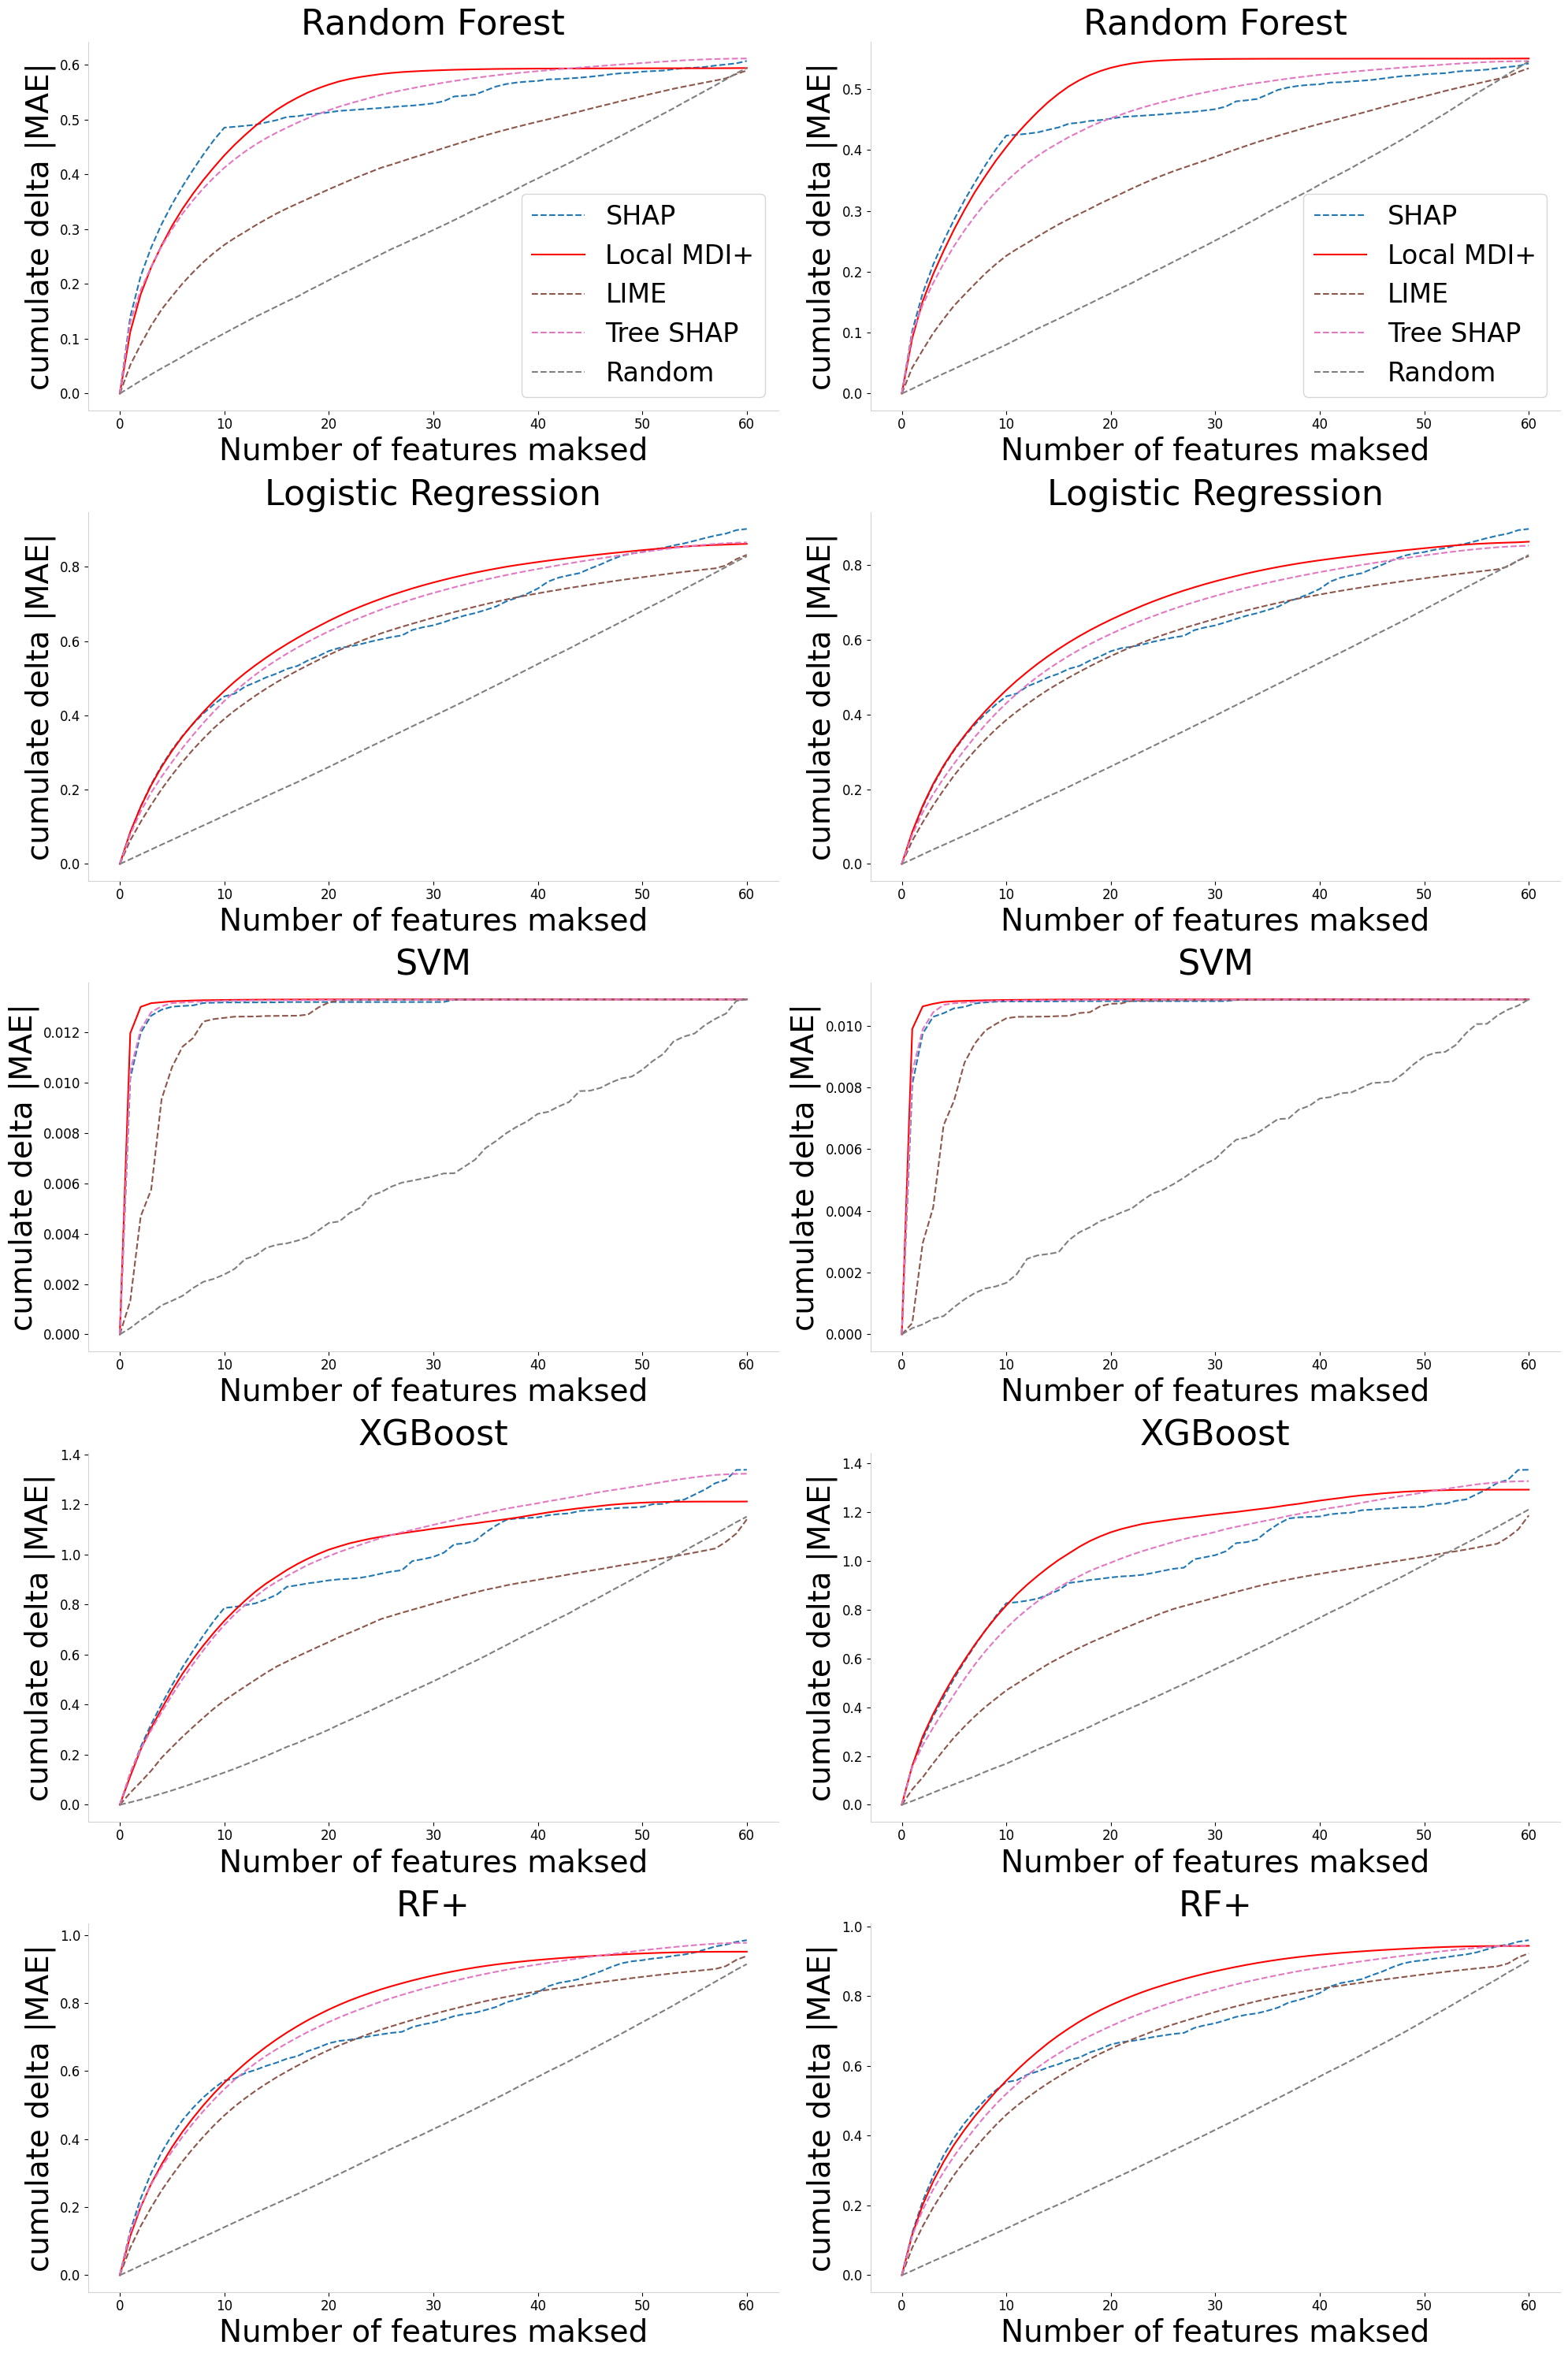

In [32]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7

method_names = {'Kernel_SHAP_RF_plus': 'SHAP', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm': "Local MDI+", 'LIME_RF_plus': 'LIME', 'TreeSHAP_RF': 'Tree SHAP', 'Random': 'Random'}
model_names = {'RF_Classifier': "Random Forest", 'LogisticCV': "Logistic Regression", 'SVM': "SVM", 'XGBoost_Classifier': "XGBoost", 'RF_Plus_Classifier': "RF+"}

fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]) * 2, figsize=(20, 30))

for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        # Train subset results
        results_train = {m: [] for m in methods_train_subset}
        for m in methods_train_subset:
            for k in range(num_features + 1):
                results_train[m].append(combined_df[combined_df['fi'] == m][a_model + f"_train_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())

        # Test results
        results_test = {m: [] for m in methods_train_subset}
        for m in methods_train_subset:
            for k in range(num_features + 1):
                results_test[m].append(combined_df[combined_df['fi'] == m][a_model + f"_test_delta_{metric}_after_ablation_{k}_absolute"].mean())

        # Test subset results
        results_test_subset = {m: [] for m in methods_train_subset}
        for m in methods_train_subset:
            for k in range(num_features + 1):
                results_test_subset[m].append(combined_df[combined_df['fi'] == m][a_model + f"_test_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())

        # Plot train subset results
        ax_train = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            linestyle = 'dashed' if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"] else '-'
            ax_train.plot(range(num_features + 1), results_train[m], label=method_names[m], linestyle=linestyle, color=color, ms=marker_size)

        ax_train.set(xlabel='Number of features maksed', ylabel=f"cumulate delta |{metric}|",
                     title=f'{model_names[a_model]}')
        ax_train.set_title(f'{model_names[a_model]}', fontsize=32)

        if i == 0:
            ax_train.legend(loc='lower right',prop={'size': 24})

        # # Plot test results
        # ax_test = axs[i, j + 2 * len(metrics[task])]  # Shift to the right for test results
        # for m in methods_train_subset:
        #     color = color_map[m]
        #     linestyle = 'dashed' if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"] else '-'
        #     ax_test.plot(range(num_features + 1), results_test[m], label=method_names[m], linestyle=linestyle, color=color, ms=marker_size)

        # ax_test.set(xlabel='Number of features maksed', ylabel=f"cumulate delta |{metric}|",
        #              title=f'{model_names[a_model]}')
        # ax_test.set_title(f'{model_names[a_model]}', fontsize=32)
        # if i == 0:
        #     ax_test.legend(loc='lower right',prop={'size': 24})

        # Plot test subset results
        ax_test_subset = axs[i, j + len(metrics[task])] # Shift further right for test subset results
        for m in methods_train_subset:
            color = color_map[m]
            linestyle = 'dashed' if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"] else '-'
            ax_test_subset.plot(range(num_features + 1), results_test_subset[m], label=method_names[m], linestyle=linestyle, color=color, ms=marker_size)

        ax_test_subset.set(xlabel='Number of features maksed', ylabel=f"cumulate delta |{metric}|",
                     title=f'{model_names[a_model]}')
        ax_test_subset.set_title(f'{model_names[a_model]}', fontsize=32)
        if i == 0:
            ax_test_subset.legend(loc='lower right',prop={'size': 24})

plt.tight_layout()
plt.savefig(f"./ablation.png")
plt.show()

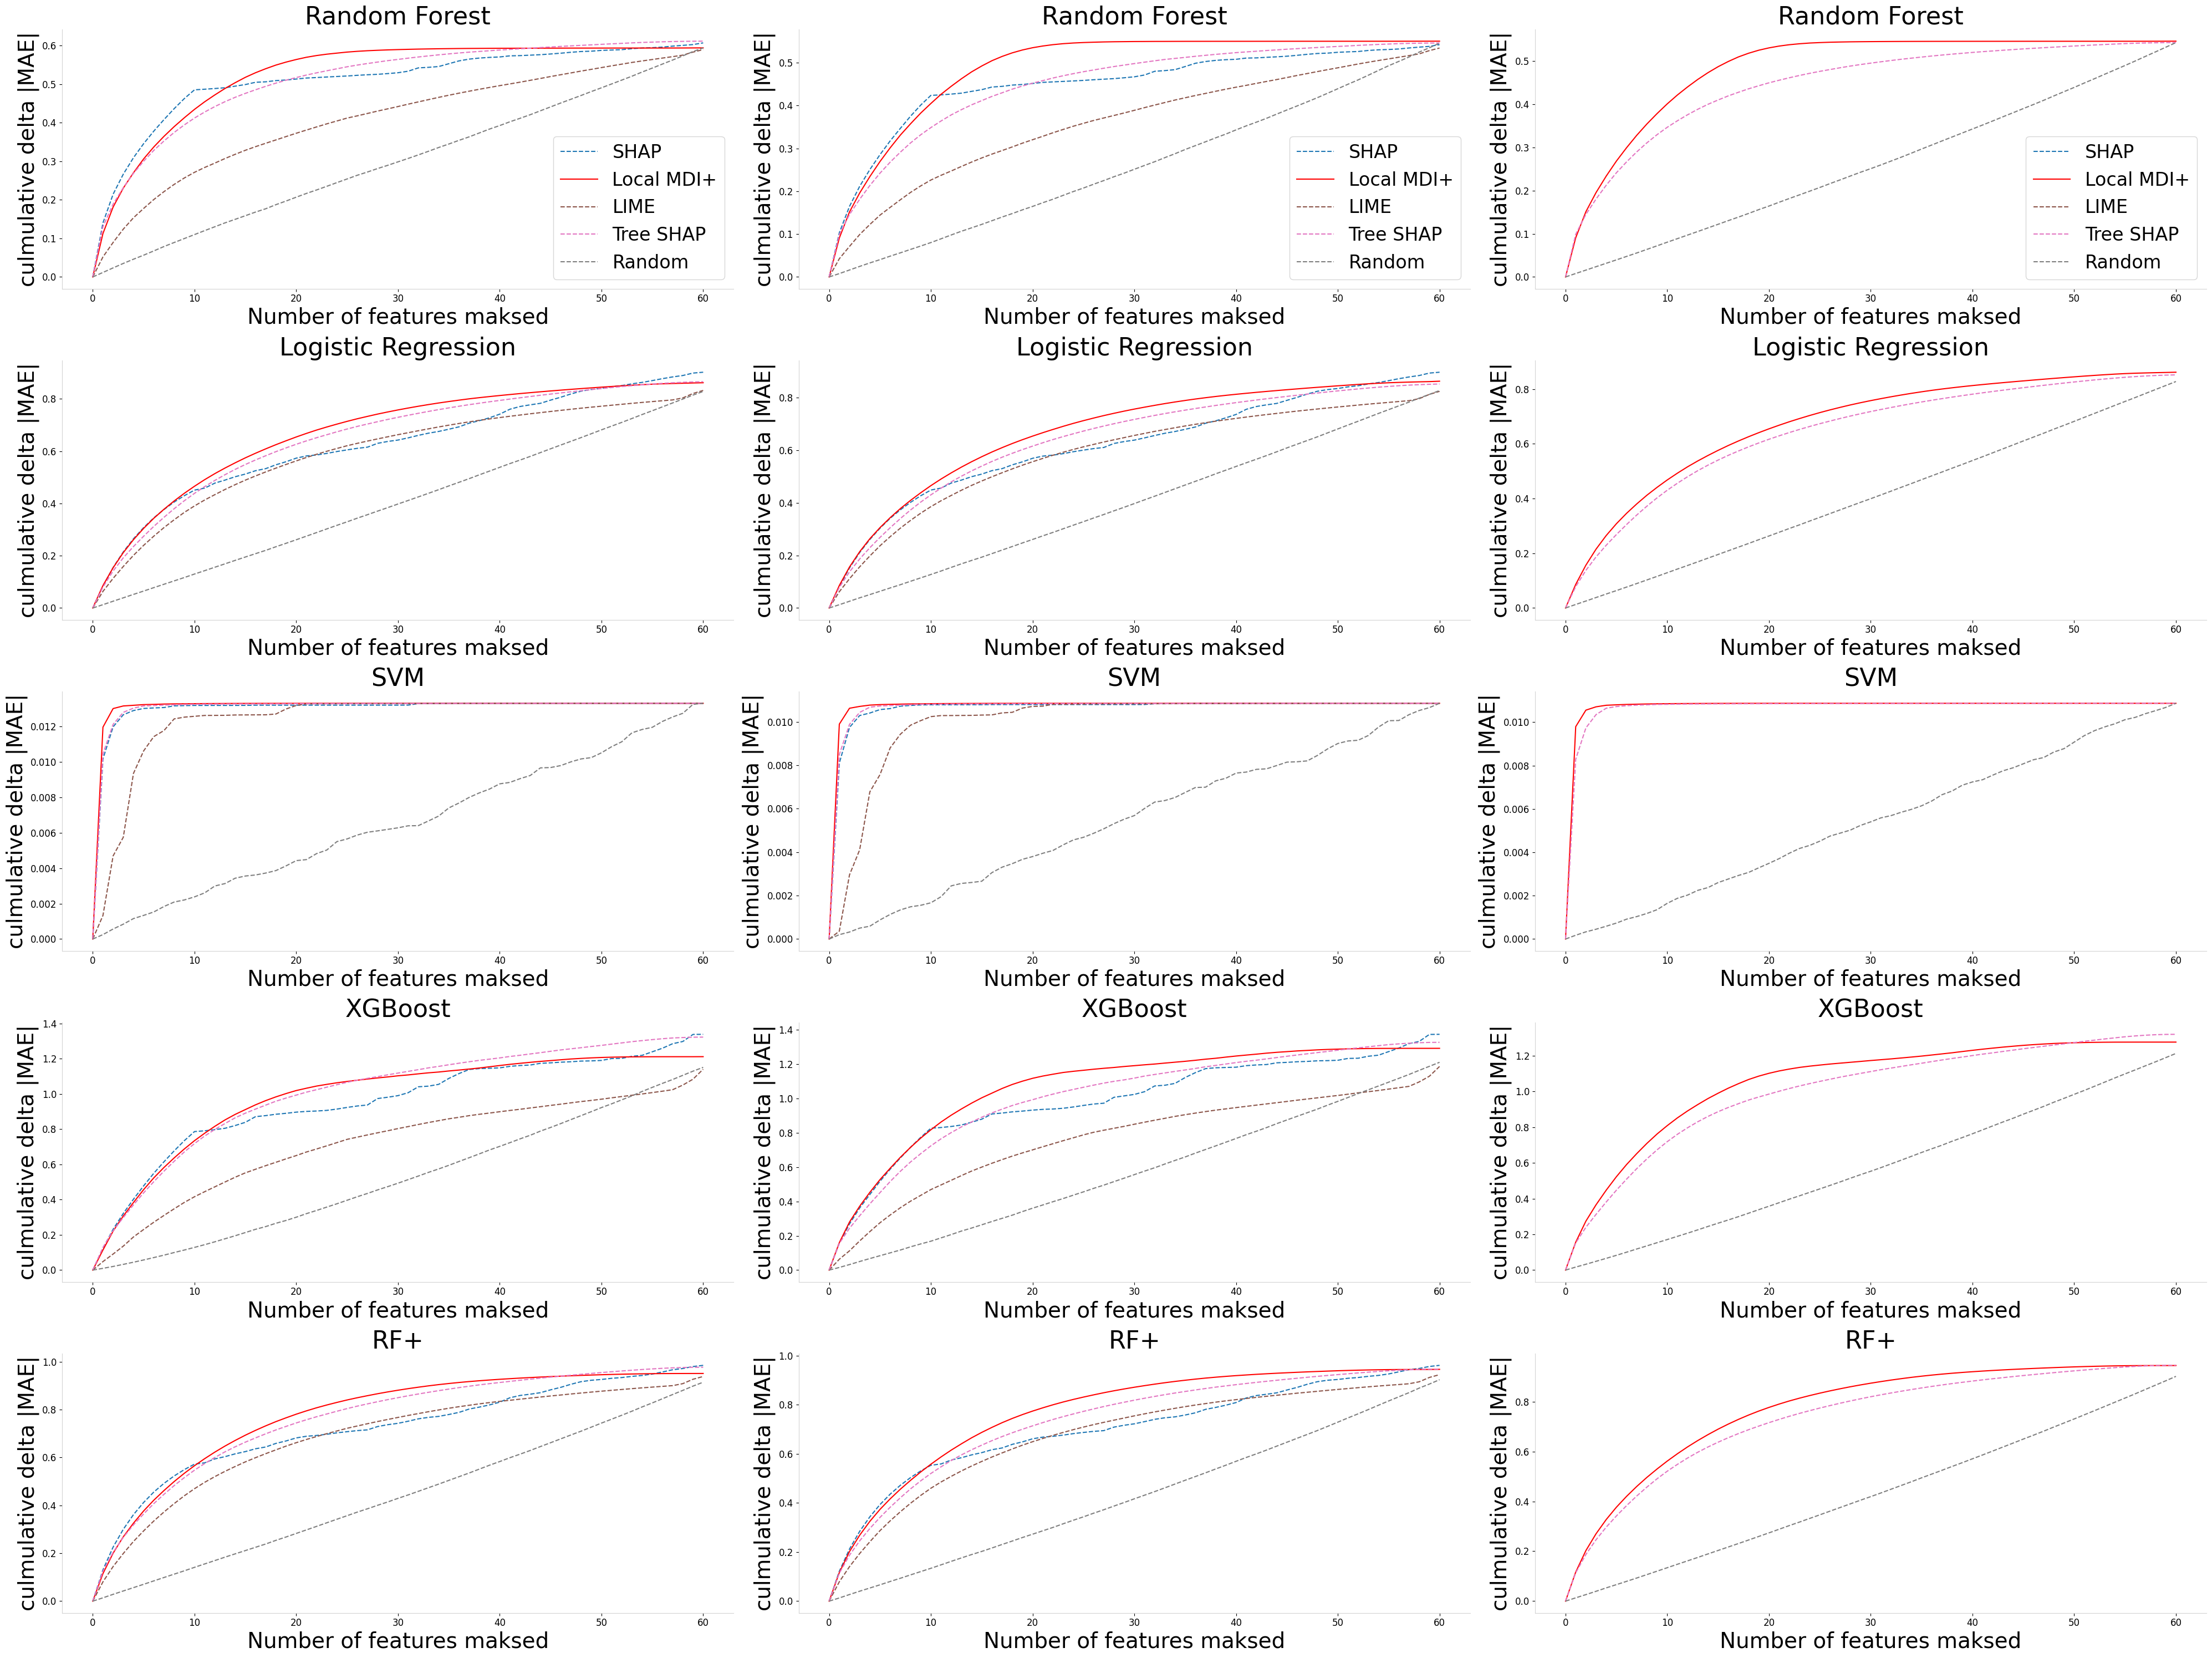

In [28]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7

method_names = {'Kernel_SHAP_RF_plus': 'SHAP', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm': "Local MDI+", 'LIME_RF_plus': 'LIME', 'TreeSHAP_RF': 'Tree SHAP', 'Random': 'Random'}
model_names = {'RF_Classifier': "Random Forest", 'LogisticCV': "Logistic Regression", 'SVM': "SVM", 'XGBoost_Classifier': "XGBoost", 'RF_Plus_Classifier': "RF+"}

fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]) * 3, figsize=(40, 30))

for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        # Train subset results
        results_train = {m: [] for m in methods_train_subset}
        for m in methods_train_subset:
            for k in range(num_features + 1):
                results_train[m].append(combined_df[combined_df['fi'] == m][a_model + f"_train_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())

        # Test results
        results_test = {m: [] for m in methods_train_subset}
        for m in methods_train_subset:
            for k in range(num_features + 1):
                results_test[m].append(combined_df[combined_df['fi'] == m][a_model + f"_test_delta_{metric}_after_ablation_{k}_absolute"].mean())

        # Test subset results
        results_test_subset = {m: [] for m in methods_train_subset}
        for m in methods_train_subset:
            for k in range(num_features + 1):
                results_test_subset[m].append(combined_df[combined_df['fi'] == m][a_model + f"_test_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())

        # Plot train subset results
        ax_train = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            linestyle = 'dashed' if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"] else '-'
            ax_train.plot(range(num_features + 1), results_train[m], label=method_names[m], linestyle=linestyle, color=color, ms=marker_size)

        ax_train.set(xlabel='Number of features maksed', ylabel=f"cumulate delta |{metric}|",
                     title=f'{model_names[a_model]}')
        ax_train.set_title(f'{model_names[a_model]}', fontsize=32)

        if i == 0:
            ax_train.legend(loc='lower right',prop={'size': 24})

        # Plot test results
        ax_test = axs[i, j + 2 * len(metrics[task])]  # Shift to the right for test results
        for m in methods_train_subset:
            color = color_map[m]
            linestyle = 'dashed' if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"] else '-'
            ax_test.plot(range(num_features + 1), results_test[m], label=method_names[m], linestyle=linestyle, color=color, ms=marker_size)

        ax_test.set(xlabel='Number of features maksed', ylabel=f"cumulate delta |{metric}|",
                     title=f'{model_names[a_model]}')
        ax_test.set_title(f'{model_names[a_model]}', fontsize=32)
        if i == 0:
            ax_test.legend(loc='lower right',prop={'size': 24})

        # Plot test subset results
        ax_test_subset = axs[i, j + len(metrics[task])] # Shift further right for test subset results
        for m in methods_train_subset:
            color = color_map[m]
            linestyle = 'dashed' if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"] else '-'
            ax_test_subset.plot(range(num_features + 1), results_test_subset[m], label=method_names[m], linestyle=linestyle, color=color, ms=marker_size)

        ax_test_subset.set(xlabel='Number of features maksed', ylabel=f"cumulate delta |{metric}|",
                     title=f'{model_names[a_model]}')
        ax_test_subset.set_title(f'{model_names[a_model]}', fontsize=32)
        if i == 0:
            ax_test_subset.legend(loc='lower right',prop={'size': 24})

plt.tight_layout()
plt.savefig(f"./ablation.png")
plt.show()

NameError: name 'methods_all' is not defined

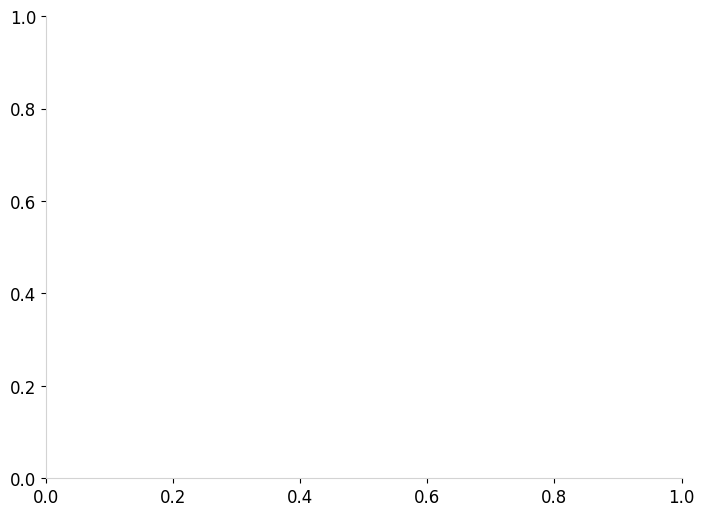

In [29]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7

# Assuming you have defined variables like ablation_models, metrics, methods_all, num_features, and combined_df

# Loop through each combination of ablation model and metric
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        fig, ax = plt.subplots(figsize=(8.2, 6))  # Create a new subplot for each combination
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        for m in methods_all:
            method_names = {'Kernel_SHAP_RF_plus': 'SHAP', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': "Local MDI+", 'LIME_RF_plus': 'LIME', 'TreeSHAP_RF': 'Tree SHAP'}
            colors = {'Kernel_SHAP_RF_plus': '#9B5DFF', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': "black", 'LIME_RF_plus': '#71BEB7', 'TreeSHAP_RF': 'orange'}
            ax.plot(range(num_features+1), results[m], '-o', label=method_names[m], color=colors[m], ms=marker_size)
        model_names = {'RF_Regressor': "Random Forest", 'Linear': "Linear Regression", 'XGB_Regressor': "XGBoost", 'RF_Plus_Regressor': "RF+"}
        #model_names = {'RF_Classifier': "Random Forest", 'LogisticCV': "Logistic Regression", 'SVM': "SVM", 'XGBoost_Classifier': "XGBoost", 'RF_Plus_Classifier': "RF+"}

        if metric == "MSE":
            ax.set(xlabel='Number of features masked', ylabel="Negative RMSE",
                   title=f'{model_names[a_model]} on Train data')
        else:
            ax.set(xlabel='Number of Positive features masked', ylabel=metric,
                   title=f'{model_names[a_model]} on Train data')
        ax.legend(loc='upper right', prop={'size': 24})  # Set legend to lower right
        ax.set_title(f'{model_names[a_model]}', fontsize=32)
        plt.tight_layout()
        plt.savefig(f"./{task_name}_{task}_{a_model}_{metric}_test1_presentation.png")
        plt.show()

#### Training Subset Data

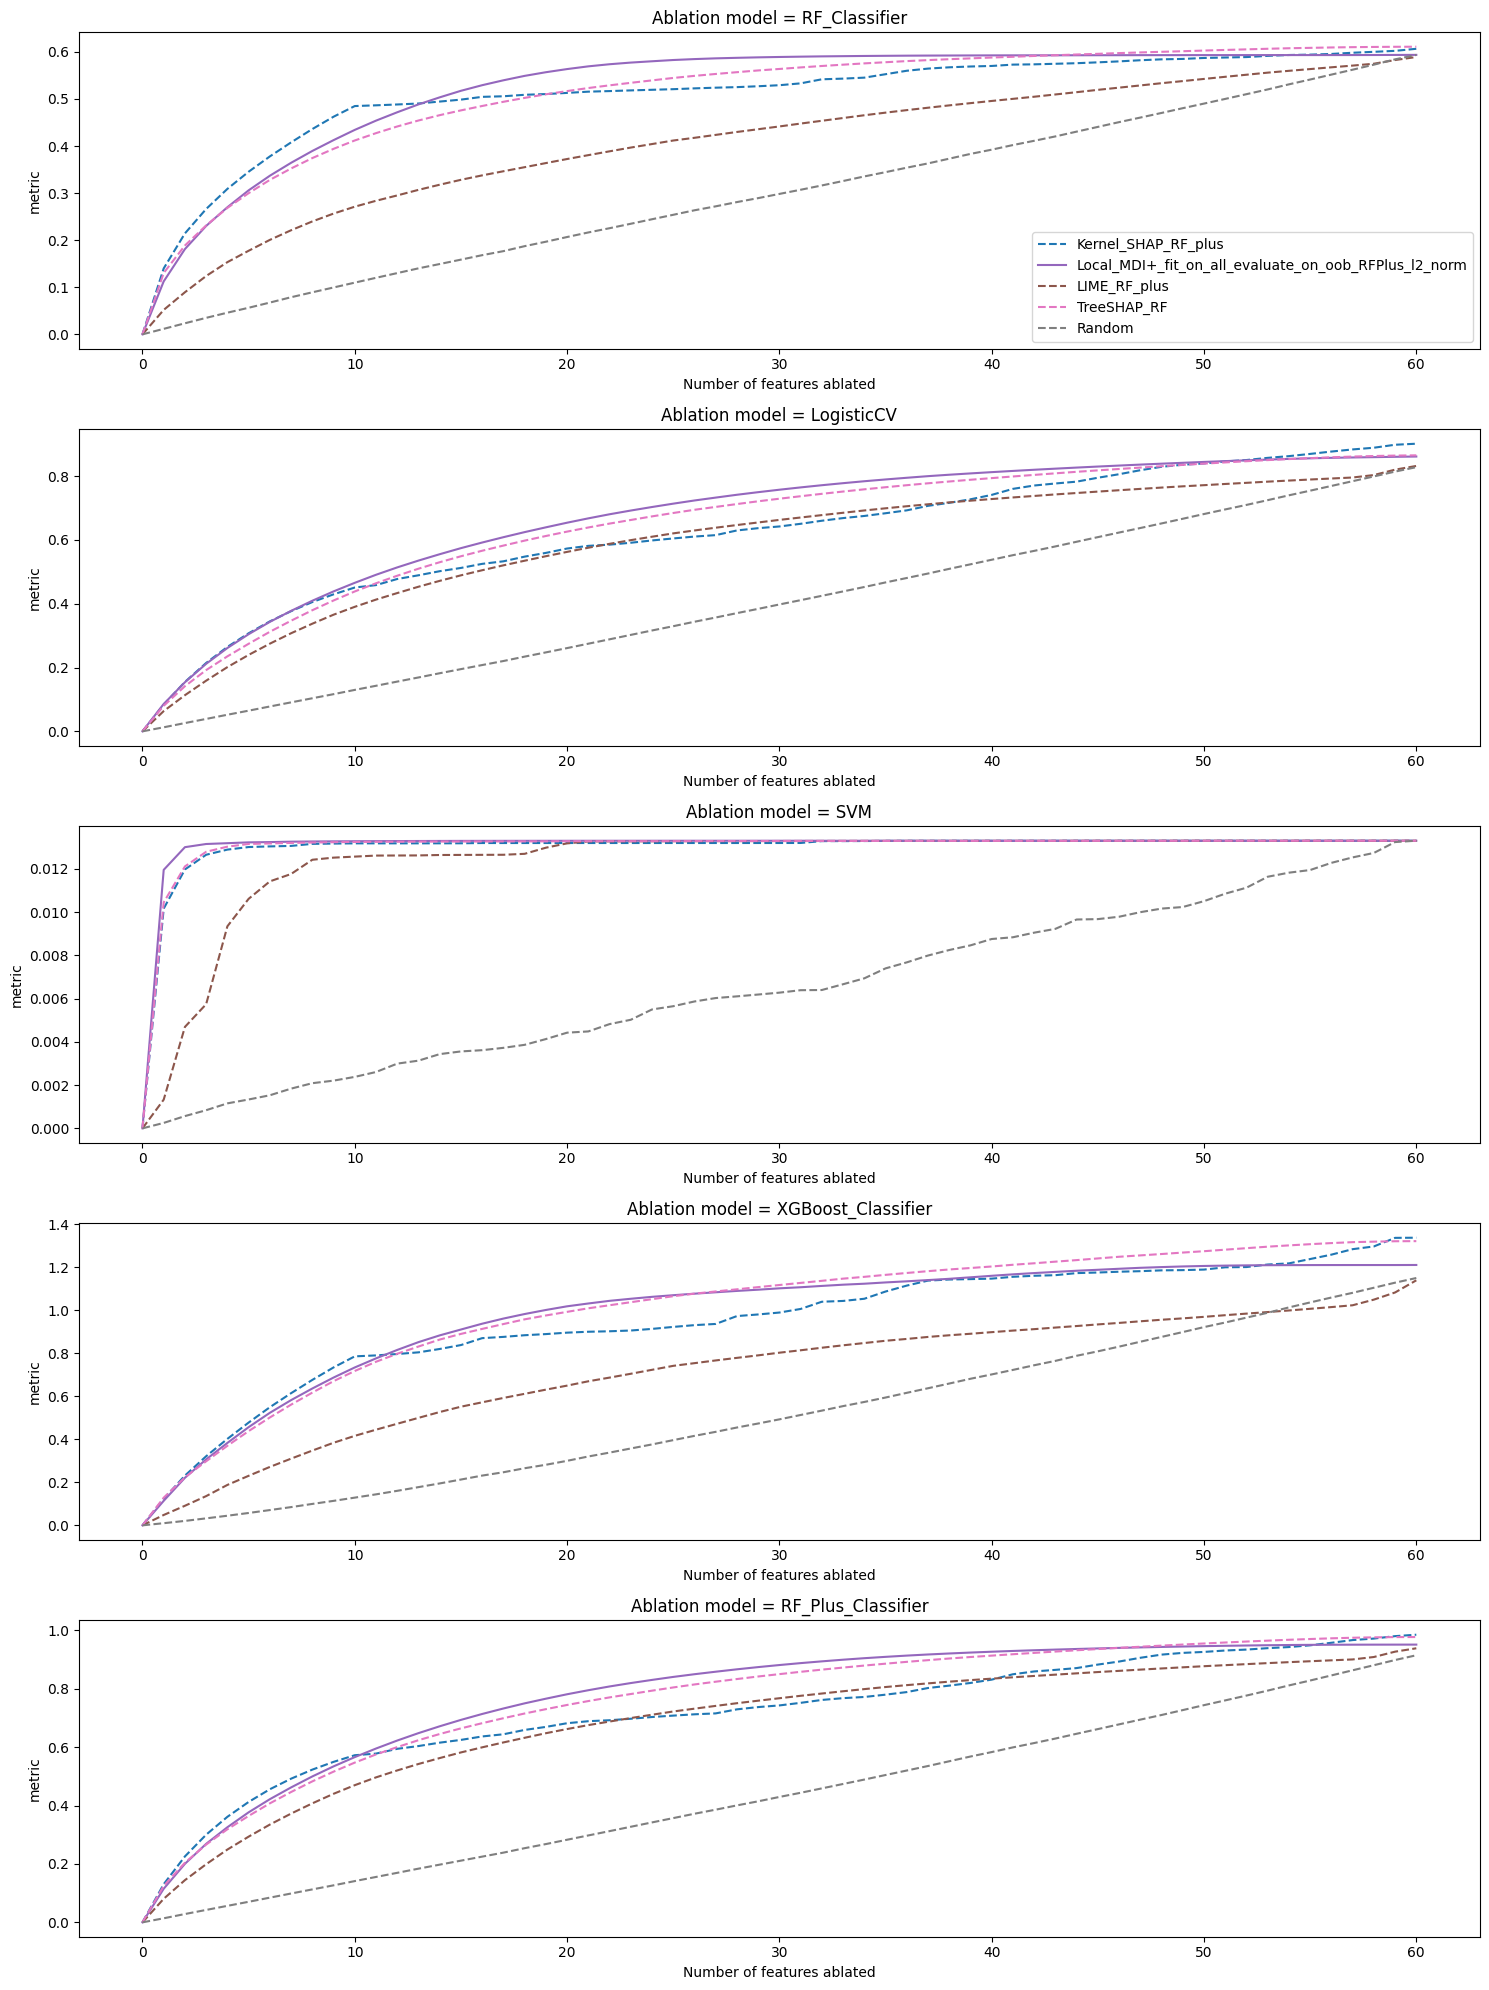

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

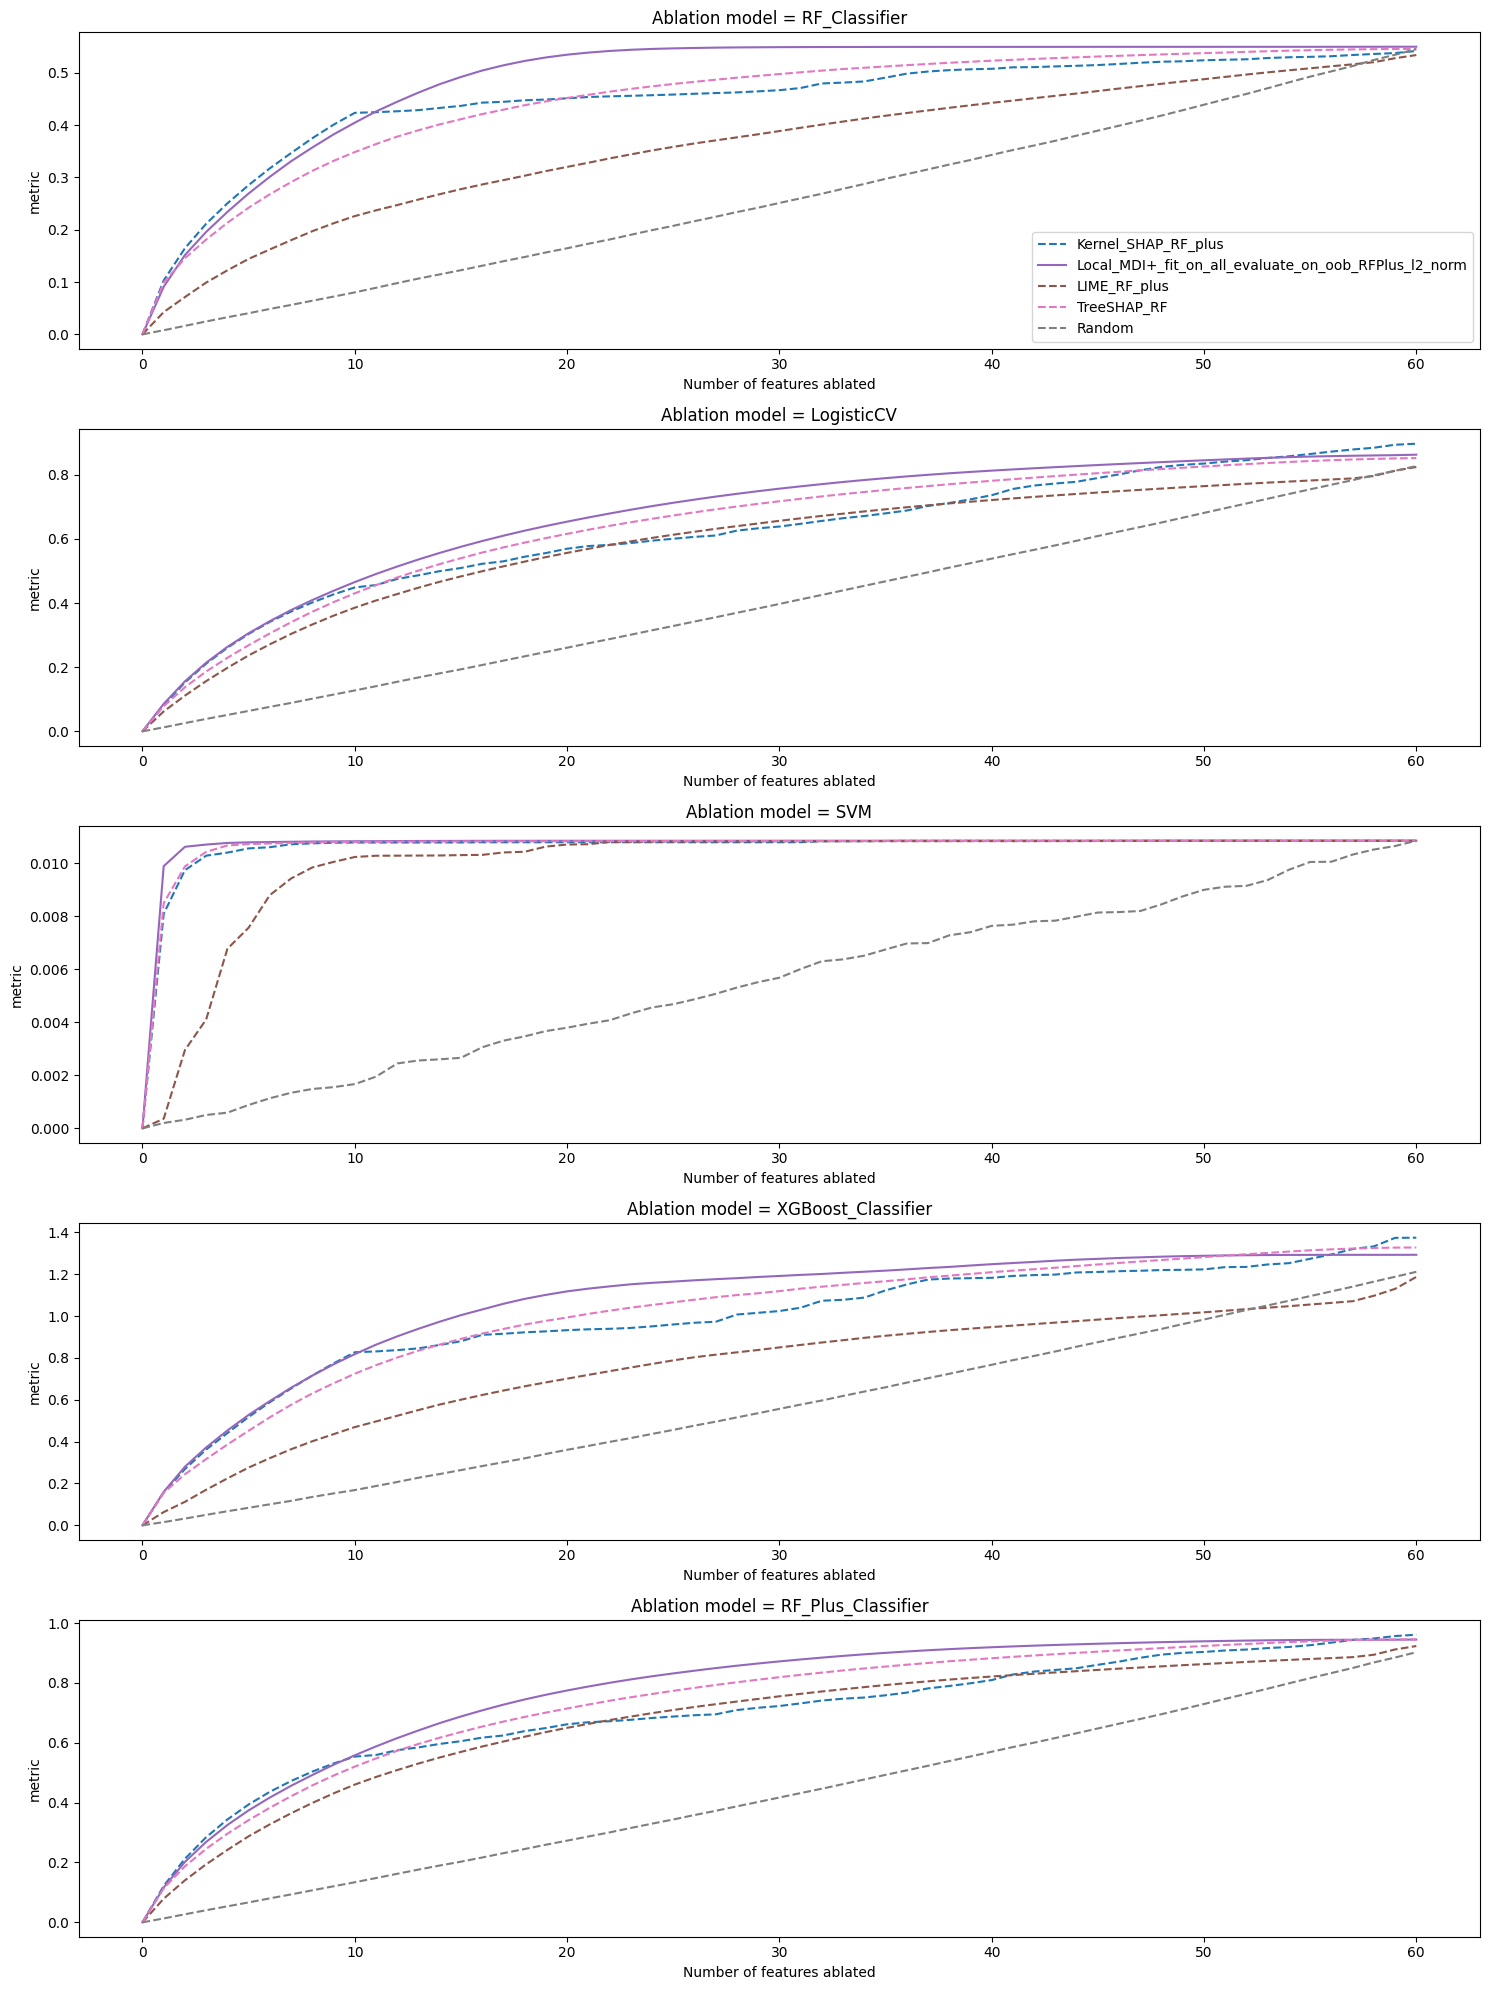

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

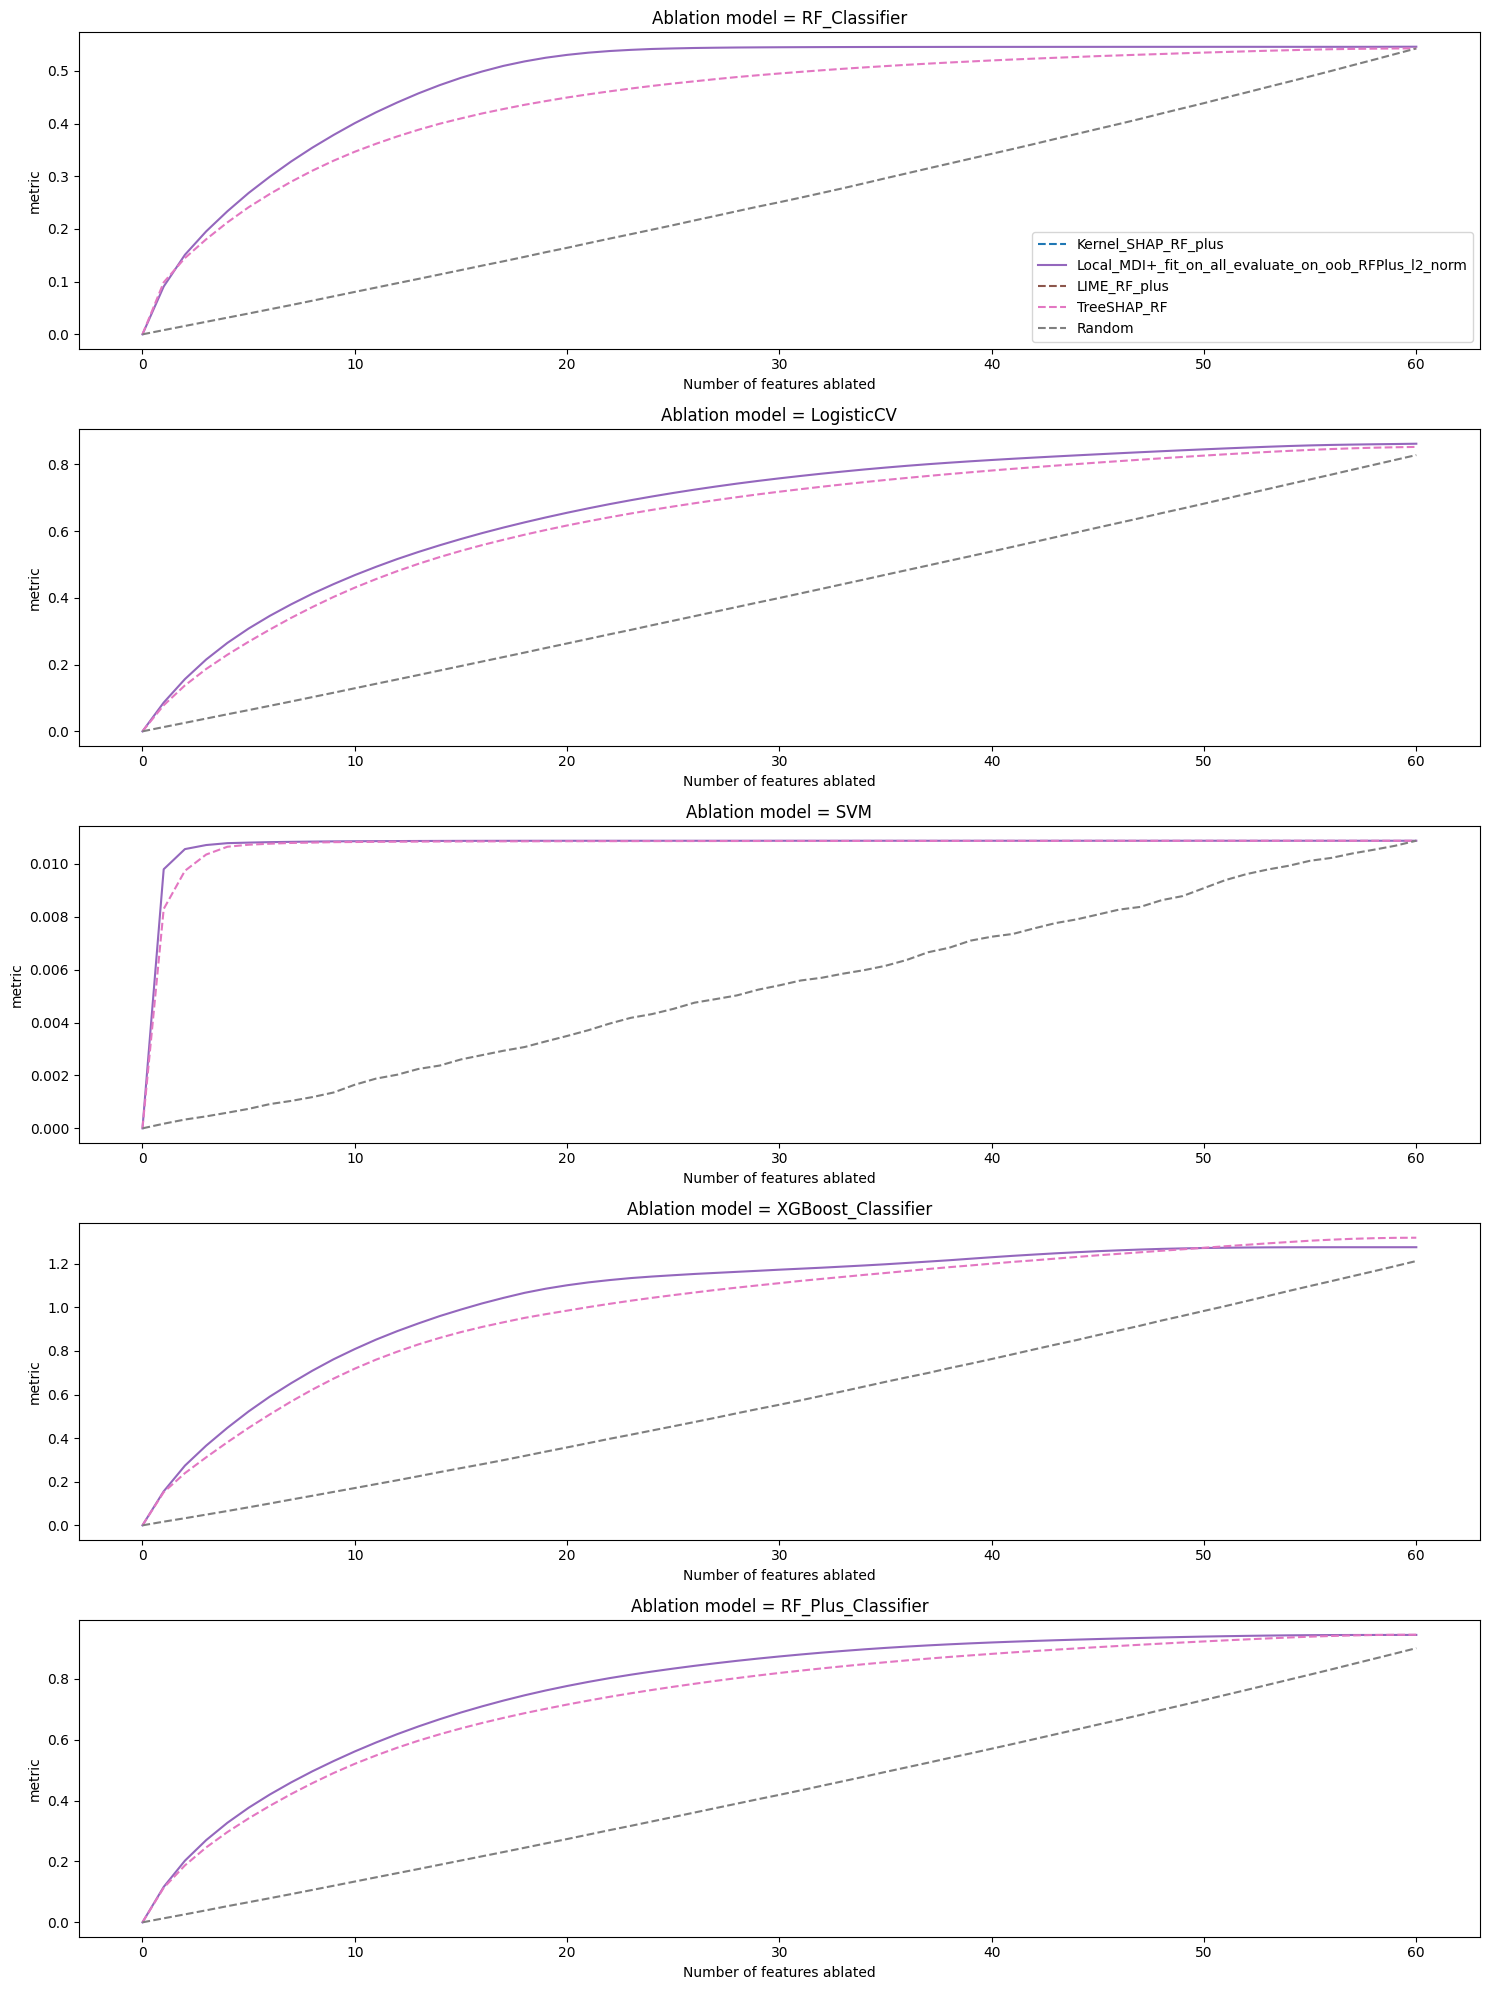

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()